In [107]:
import pandas as pd
import numpy as np
#from pandas.io.common import is_url
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import random
from fuzzywuzzy import fuzz
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
path="D:/scrapping/magicbricks/"
df=pd.read_csv(f'{path}data_gnr_jan.csv')

In [3]:
df.description[0]

'2 Bath,Unfurnished,16 floor Paramount Golf Forest Ac Apartments complimented by designer landscape with a green golf course for you and your family, a well-deserved healthy lifestyle.'

In [4]:
print('We have ', len(df), 'properties in the data')

We have  1555 properties in the data


In [5]:
def print_description(society):
    example = df[df.Society == society][['description_rpn', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])

In [8]:
print_description('Nirala Aspire')

2 Bath Unfurnished North   East facing The flat located are very good condition and well developed area This area are very spaciable and good material also All major electricity and water supply connections are already installed Moduler kitchen available in this flat This comfortable flat with attached bathroom 
Name: 2 BHK Apartment for Sale in Nirala Aspire, Greater Noida West


In [7]:
df['description_rpn'] = df['description'].str.replace('[^\w\s]',' ')

In [130]:
stop = stopwords.words('english')
df['description_rpn'] = df['description_rpn'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [131]:
freq = pd.Series(' '.join(df['description_rpn']).split()).value_counts()[:10]

In [132]:
freq

floor          1535
2              1241
apartment      1211
multistorey    1039
noida           811
greater         768
available       668
facing          641
3               639
sale            522
dtype: int64

In [12]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [74]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [46]:
STOPWORDS=stopwords.words("english")

In [44]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [63]:
def clean_text(text):
    ps=PorterStemmer()
    
    #text=deEmojify(text) # remove emojis
    tokenizer=text.split(" ")
    text_cleaned=" ".join([x for x in tokenizer if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    #text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned

In [64]:
df['description_rpn']=df['description'].apply(lambda x:clean_text(x))

In [65]:
df['description_rpn'][1]

'2 bath,semi-furnished ska metro ville is the fresh launch residential group housing project in greater noida by ska group. ska metro ville greater noida is igbc gold pre-certified project which aims to promote green homes, where residents could live with quality lifestyle and optimal use of natural resources. the project covers an area of 20073.90 sq. meter comprises four towers with 1062 luxurious apartments designed in modern style with brilliant interior, also basic and advanced features are provided to enhance lifestyle of residents. the overall project is based on miven construction technology resulting more seismic resistance, durability and higher carpet area.'

In [14]:
common_words = get_top_n_words(df['description_rpn'], 100)

In [75]:
common_words=get_top_n_trigram(df['description_rpn'], 100)

In [76]:
common_words

[('floor', 2068),
 ('bath', 1560),
 ('apartment', 1240),
 ('multistorey', 1039),
 ('multistorey apartment', 1037),
 ('furnished', 984),
 ('noida', 923),
 ('greater', 776),
 ('greater noida', 771),
 ('available', 761),
 ('semi', 760),
 ('semi furnished', 758),
 ('bath semi', 712),
 ('bath semi furnished', 712),
 ('facing', 682),
 ('unfurnished', 639),
 ('bath unfurnished', 613),
 ('sale', 608),
 ('available sale', 548),
 ('bhk', 545),
 ('east', 508),
 ('located', 497),
 ('apartment available', 492),
 ('apartment available sale', 491),
 ('furnished floor', 484),
 ('floors', 472),
 ('east facing', 457),
 ('multistorey apartment available', 448),
 ('total', 441),
 ('lac', 441),
 ('bhk multistorey', 407),
 ('bhk multistorey apartment', 407),
 ('floor bhk', 378),
 ('semi furnished floor', 375),
 ('floor bhk multistorey', 347),
 ('flat', 332),
 ('apartment located', 332),
 ('unfurnished floor', 326),
 ('bath unfurnished floor', 326),
 ('floor multistorey', 312),
 ('floor multistorey apartment

In [77]:
df6 = pd.DataFrame(common_words, columns = ['description' , 'count'])

In [29]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31032 entries, 0 to 31031
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  31032 non-null  object
 1   count        31032 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 485.0+ KB


In [30]:
df6.drop(df6[df6['count']<10].index, inplace=True)

In [31]:
df6.shape

(839, 2)

In [32]:
df6=df6.head(200)

In [36]:
df6.head()

,description,count
0,multistorey apartment,1037
1,greater noida,771
2,semi furnished,758
3,bath semi,712
4,bath semi furnished,712


In [33]:
keywords_metadata=[]

In [34]:
for value in df6['description']:
    keywords_metadata.append(value)
    

In [35]:
keywords_metadata

['multistorey apartment',
 'greater noida',
 'semi furnished',
 'bath semi',
 'bath semi furnished',
 'bath unfurnished',
 'available sale',
 'apartment available',
 'apartment available sale',
 'furnished floor',
 'east facing',
 'multistorey apartment available',
 'bhk multistorey',
 'bhk multistorey apartment',
 'floor bhk',
 'semi furnished floor',
 'floor bhk multistorey',
 'apartment located',
 'unfurnished floor',
 'bath unfurnished floor',
 'floor multistorey',
 'floor multistorey apartment',
 'multistorey apartment located',
 'building total',
 'floor north',
 'north east',
 'floor east',
 'floor east facing',
 'bath furnished',
 'north east facing',
 'tower total',
 'floor tower',
 'floor tower total',
 'floor north east',
 'furnished floor bhk',
 'noida west',
 'greater noida west',
 'floor building',
 'floor building total',
 'ground floor',
 'total floors',
 'apartment building',
 'apartment building total',
 'bath furnished floor',
 'sale sector',
 'available sale sector'

In [133]:
df['description_rpn'][2]

'2 bath,semi-furnished prideville understand must balance professional personal life. keeping view, imperia family, come 1/2bhk projects sports city, yamuna expressway surrounded lush green environment vicinity various professional hubs around noida greater noida. thus, reducing time commutation giving opportunity time family.'

In [87]:
# generate unigrams 
unigrams  = (
    df['description'].str.lower()
                .str.replace(r'[^a-z\s]', ' ')
                .str.split(expand=True)
                .stack())

# generate bigrams by concatenating unigram columns
bigrams = unigrams + ' ' + unigrams.shift(-1)
# generate trigrams by concatenating unigram and bigram columns
trigrams = bigrams + ' ' + unigrams.shift(-2)

# concatenate all series vertically, and remove NaNs
df7=pd.concat([unigrams, bigrams, trigrams]).dropna().reset_index(drop=True)

In [89]:
df7.head()

0           bath
1    unfurnished
2          floor
3      paramount
4           golf
dtype: object

In [85]:
def generate_ngrams(s, n):
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[token[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['description_rpn'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the description")
plt.axis('off')
plt.show()

In [93]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [94]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [95]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [134]:
df['sentiment_score']=df['description_rpn'].apply(lambda x:compound_score(x))

In [135]:
df.head()

,Unnamed: 0,Society,addressLocality,agentCompanyName,agentMaskedmobilenumber,agentName,bathroom,bedroom,builderName,cityName,...,numberOfRooms,postedBy,price,priceInWord,projectName,propertyType,url,description_rpn,sentiment_score,review_category
0,0,Golfforeste AC Apartments,Zeta 1,BD Green Home Pvt. Ltd.,+91-88XXXXXXX90,Praveen Choudhary,2.0,2.0,Paramount Group,Greater Noida,...,2.0,Agent,3710000.0,37.1 Lac,Golfforeste AC Apartments,Apartment,https://www.magicbricks.com/propertyDetails/2-...,"2 bath,unfurnished,16 floor paramount golf for...",0.6705,positive
1,1,SKA Metro Ville,"Eta 2, Eta",NaN,+91-91XXXXXXX15,SKA GROUP,2.0,2.0,SKA Group,Greater Noida,...,2.0,Builder,2560000.0,25.6 Lac,SKA Metro Ville,Apartment,https://www.magicbricks.com/propertyDetails/2-...,"2 bath,semi-furnished ska metro ville fresh la...",0.9565,positive
2,2,Prideville,Yamuna Expressway,Imperia Structures Ltd.,+91-74XXXXXXX93,Vipin,2.0,2.0,Imperia Structures Ltd.,Greater Noida,...,2.0,Builder,4680000.0,46.8 Lac,Prideville,Apartment,https://www.magicbricks.com/propertyDetails/2-...,"2 bath,semi-furnished prideville understand mu...",0.7717,positive
3,3,Purvanchal Royal City,Chi 5,Purvanchal Projects Pvt. Ltd.,+91-78XXXXXXX42,Shashi Kapoor,4.0,4.0,Purvanchal Projects Pvt. Ltd.,Greater Noida,...,4.0,Builder,11200000.0,1.12 Cr,Purvanchal Royal City,Apartment,https://www.magicbricks.com/propertyDetails/4-...,"4 bath,semi-furnished,19 floor life live abund...",0.9559,positive
4,4,Stellar One,Greater Noida West,Stellar Ventures Pvt. Ltd.,+91-98XXXXXXX77,Stellar Ventures Pvt. Ltd.,2.0,2.0,Stellar Ventures Pvt. Ltd.,Greater Noida,...,2.0,Builder,3110000.0,31.1 Lac,Stellar One,Apartment,https://www.magicbricks.com/propertyDetails/2-...,"2 bath,unfurnished greater noida(west), along ...",0.8718,positive


In [136]:

def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [137]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))

Text(0.5, 1.0, 'Distribution of Reviews Category')

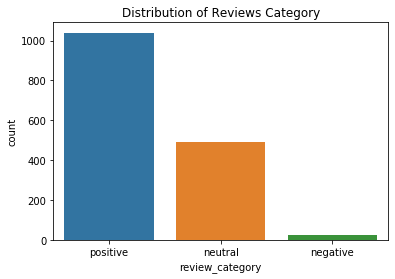

In [138]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [139]:
positive_reviews=df.loc[df['review_category']=='positive','description_rpn'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

['2 bath,unfurnished,16 floor paramount golf forest ac apartments complimented designer landscape green golf course family, well-deserved healthy lifestyle.',
 '2 bath,semi-furnished ska metro ville fresh launch residential group housing project greater noida ska group. ska metro ville greater noida igbc gold pre-certified project aims promote green homes, residents could live quality lifestyle optimal use natural resources. project covers area 20073.90 sq. meter comprises four towers 1062 luxurious apartments designed modern style brilliant interior, also basic advanced features provided enhance lifestyle residents. overall project based miven construction technology resulting seismic resistance, durability higher carpet area.',
 '2 bath,semi-furnished prideville understand must balance professional personal life. keeping view, imperia family, come 1/2bhk projects sports city, yamuna expressway surrounded lush green environment vicinity various professional hubs around noida greater n

In [140]:

negative_reviews=df.loc[df['review_category']=='negative','description_rpn'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

['1 bath,unfurnished,ground floor,east facing said property alloted gnida authority lig flats situated ground floor block 19 ,sector 10,',
 '2 bath,unfurnished,4 floor,north east facing structure earthquake resistant rcc framed structure.doors windows external doors windows made powder coated aluminium. internal hardwood frames flush doors.electrical copper wiring concealed p.v.c. conduits. sufficient light power points. provision t.v., telephone points living room bedrooms.flooring vitrified tiles drawing/dining/bedrooms kitchen. anti skid ceramic tiles toilets balcony. laminated wooden flooring master bedroom.kitchen granite top working platform. stainless steel sin',
 '2 bath,semi-furnished,8 floor,east facing restrictions tenants regarding partiesmusicnoisno charges rent maintenanceyes drainagesewage systems planned prevent leakageseepagefamilies staying neighbourhood',
 '1 bath,furnished,5 floor,east facing big park fully furnished also low price',
 '2 bath,15 x 13.33 sqm,semi-fur

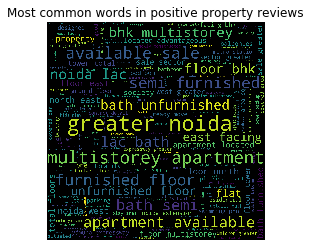

In [141]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='positive','description_rpn'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive property reviews")
plt.axis('off')
plt.show()

In [142]:
from collections import Counter

In [143]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)

In [144]:
top_20_positive_review_words=getMostCommon(positive_reviews,40)

In [145]:
top_20_positive_review_words

[('2', 922),
 ('floor', 851),
 ('noida', 792),
 ('greater', 764),
 ('apartment', 764),
 ('available', 633),
 ('multistorey', 631),
 ('sale', 508),
 ('3', 495),
 ('bhk,', 440),
 ('lac(s)', 428),
 ('facing', 413),
 ('1', 303),
 ('located', 271),
 ('flat', 224),
 ('east', 182),
 ('property', 164),
 ('one', 146),
 ('4', 144),
 ('floor,north', 138),
 ('covered', 134),
 ('area', 133),
 ('total', 129),
 ('floors.', 127),
 ('sector', 126),
 ('floor,east', 125),
 ('project', 115),
 ('tower', 115),
 ('1,', 111),
 ('5', 107),
 ('space', 104),
 ('villa', 103),
 ('good', 93),
 ('parking', 91),
 ('advantageous', 87),
 ('living', 86),
 ('well', 86),
 ('west,', 86),
 ('construction', 81),
 ('facilities', 78)]

In [115]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

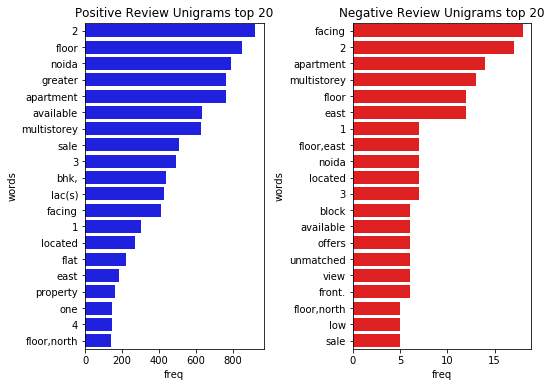

In [146]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])

In [151]:
def generateNGram(text,n=2):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [148]:
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in negative_reviews]

In [149]:
positive_reviews_bigrams[:5]

['2_bath,unfurnished,16 bath,unfurnished,16_floor floor_paramount paramount_golf golf_forest forest_ac ac_apartments apartments_complimented complimented_designer designer_landscape landscape_green green_golf golf_course course_family, family,_well-deserved well-deserved_healthy healthy_lifestyle.',
 '2_bath,semi-furnished bath,semi-furnished_ska ska_metro metro_ville ville_fresh fresh_launch launch_residential residential_group group_housing housing_project project_greater greater_noida noida_ska ska_group. group._ska ska_metro metro_ville ville_greater greater_noida noida_igbc igbc_gold gold_pre-certified pre-certified_project project_aims aims_promote promote_green green_homes, homes,_residents residents_could could_live live_quality quality_lifestyle lifestyle_optimal optimal_use use_natural natural_resources. resources._project project_covers covers_area area_20073.90 20073.90_sq. sq._meter meter_comprises comprises_four four_towers towers_1062 1062_luxurious luxurious_apartments 

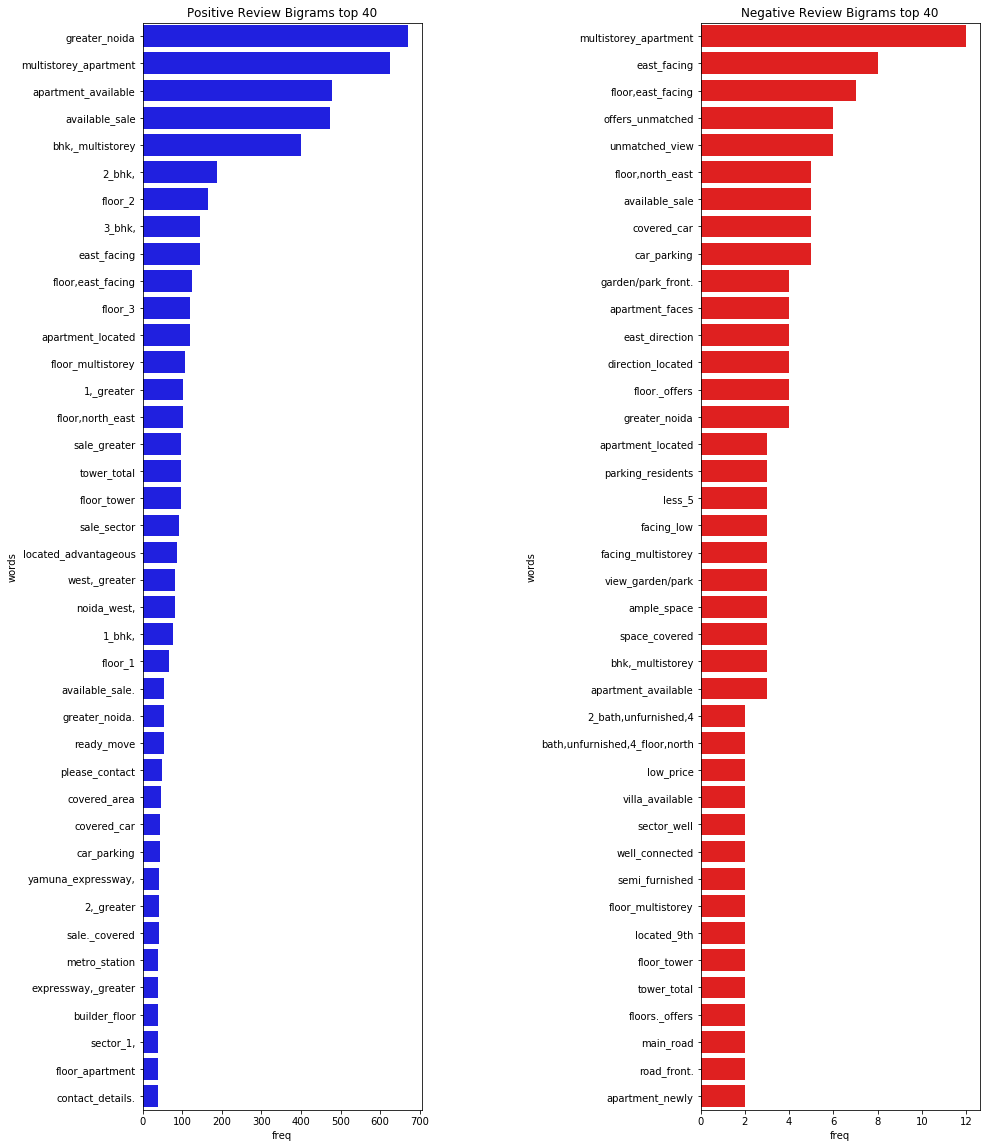

In [150]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])